In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
import time
warnings.filterwarnings("ignore")

# Specifying figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

In [166]:
df = pd.read_csv("../../data/processed/cluster_model_train.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224831,0.386912,1.185980,1.062733,0.721064,1.062733,0.721064,-1.053649,1.424322,-0.213326
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.639890,0.731121,0.865604,0.284170,0.721064,0.284170,0.721064,1.861526,1.424322,2.110809
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.021610,-0.397119,0.279576,-0.105112,0.721064,-0.105112,0.721064,0.565893,1.424322,1.077860
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.299412,-0.397119,0.994147,0.284170,0.721064,0.284170,0.721064,-1.053649,1.424322,-0.213326
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.952805,6.343633,2.815453,2.619860,0.721064,2.619860,0.721064,-1.053649,3.771941,0.819623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125931,-0.397119,1.096759,1.062733,0.721064,1.062733,0.721064,0.565893,0.250512,0.561385
6666,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.029007,2.413918,7.126529,-0.494394,0.721064,-0.494394,0.721064,-1.053649,0.250512,-0.729801
6667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.578280,0.511210,1.842909,0.284170,0.721064,0.284170,0.721064,1.213709,0.250512,1.077860
6668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.552338,2.413918,3.239257,-0.883675,0.721064,-0.883675,0.721064,-0.729741,0.250512,-0.471564


In [167]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=7)

df_reduced = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
total_expalined_variance = pca.explained_variance_ratio_.sum()
print("Total explained variance ratio:", total_expalined_variance)


Explained variance ratio: [0.44859888 0.14567571 0.08122074 0.0624739  0.04694636 0.03777136
 0.03059412]
Total explained variance ratio: 0.8532810691462146


In [140]:
# # Visualizing the data
# plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
# q_low = df_reduced.quantile(0.01)
# q_hi = df_reduced.quantile(0.99)
# filtered = df_reduced[(df_reduced['PC1'] > q_low['PC1']) & (df_reduced['PC1'] < q_hi['PC1']) &
#                       (df_reduced['PC2'] > q_low['PC2']) & (df_reduced['PC2'] < q_hi['PC2'])]
# plt.scatter(filtered['PC1'], filtered['PC2'], c='b', **plot_kwds)
# plt.show()

In [141]:
# defining a utility function for testing the clustering algorithms
def plot_clusters(data, algorithm, kwds):
    # cluster the data while taking the time the process needs 
    start_time = time.time()
    data['cluster_kmeans'] = algorithm(**kwds).fit_predict(data)
    end_time = time.time()
    
    # defining the colors for visual representation
    sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', data=data, palette='Set2', s=60)
    # plotting the data, removing the axis and adding title and time 
    plt.scatter(data.T[0], data.T[1], **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

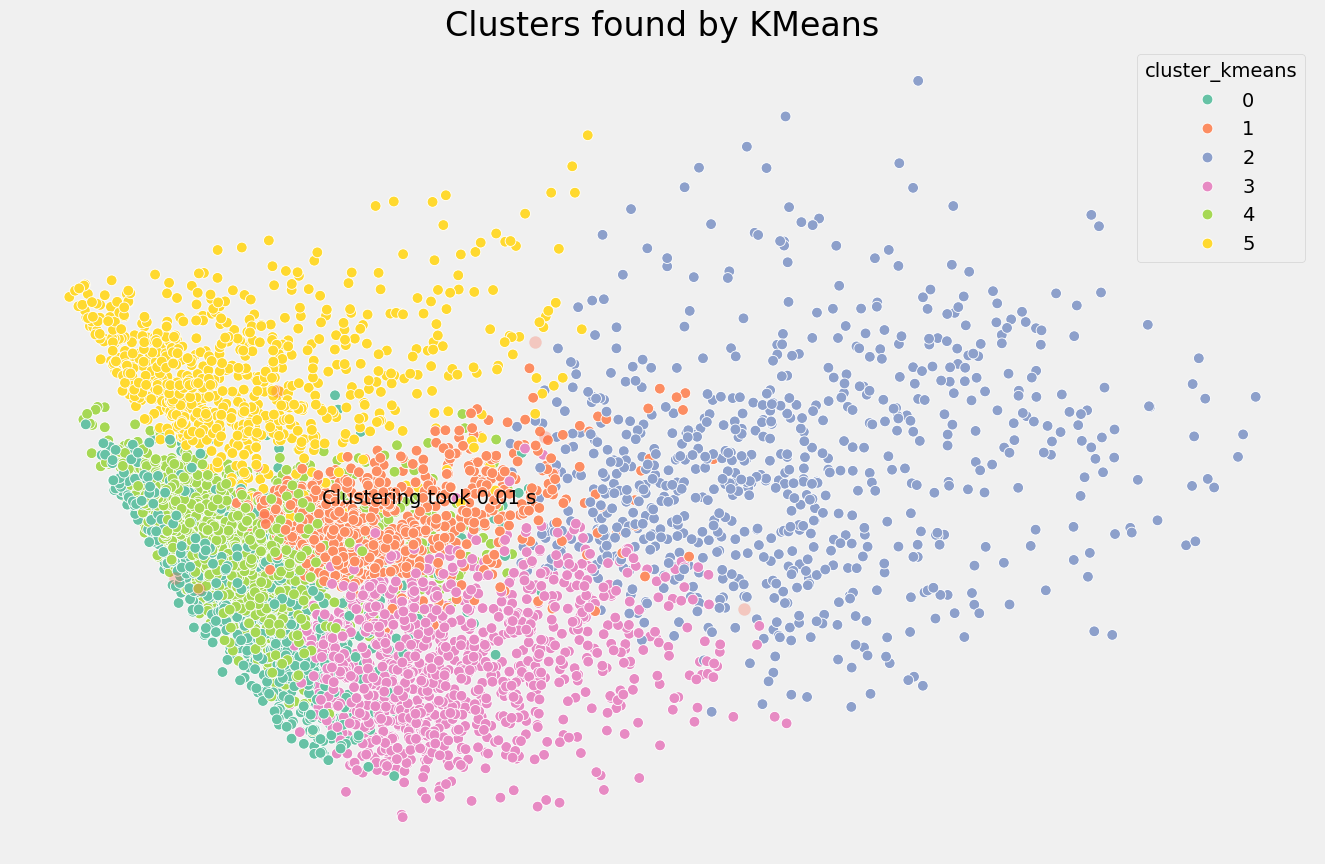

In [142]:
plot_clusters(df_reduced, KMeans, {'n_clusters': 6})